### Tensorflow - keras

* keras - API de alto nivel que proporciona capas, optimizadores, y clases ya hchas para creación de redes neuronales.

* Tensorflow - API de bajo nivel motor de cómputo para entrenar las redes neuronales con los cálculos de gradientes y actualización de parámetros.

In [1]:
import tensorflow as tf 
keras = tf.keras

print(tf.__version__)
print(keras.__version__)

2.18.0
3.8.0


In [9]:
import seaborn as sns 
import pandas as pd 
import sklearn 
import random
import random as np

In [3]:
from sklearn.model_selection import train_test_split


df = sns.load_dataset('mpg').dropna()
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### API Sequential

In [4]:
help(keras.layers.Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.layers.layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, lora_rank=None, **kwargs)
 |
 |  Just your regular densely-connected NN layer.
 |
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |
 |  Note: If the input to the layer has a rank greater than 2, `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  F

In [5]:
help(keras.Model)

Help on class Model in module keras.src.models.model:

class Model(keras.src.backend.tensorflow.trainer.TensorFlowTrainer, keras.src.trainers.trainer.Trainer, keras.src.layers.layer.Layer)
 |  Model(*args, **kwargs)
 |
 |  A model grouping layers into an object with training/inference features.
 |
 |  There are three ways to instantiate a `Model`:
 |
 |  ## With the "Functional API"
 |
 |  You start from `Input`,
 |  you chain layer calls to specify the model's forward pass,
 |  and finally, you create your model from inputs and outputs:
 |
 |  ```python
 |  inputs = keras.Input(shape=(37,))
 |  x = keras.layers.Dense(32, activation="relu")(inputs)
 |  outputs = keras.layers.Dense(5, activation="softmax")(x)
 |  model = keras.Model(inputs=inputs, outputs=outputs)
 |  ```
 |
 |  Note: Only dicts, lists, and tuples of input tensors are supported. Nested
 |  inputs are not supported (e.g. lists of list or dicts of dict).
 |
 |  A new Functional API model can also be created by using the
 

In [11]:
# 0. OPCIONAL: Establecer semilla
    #keras.backend.clear_session()
    #seed = 42
    #tf.random.set_seed(seed)
    #np.random.seed(seed)
    #random.seed(seed)


# 1. Crear la aarquitectura de la red neuronal

model = keras.Sequential([
    # Para ete caso de uso Sequential pasando las capas como lista no es obligatorio especificar capa Input
    # keras.layers.Input(shape=(X.shape[1])),
    # keeras.layers.Input(shape=(6,))
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1) # para regresión solo 1 neurona sin funicón activación (función activación lineal por defecto)
])

# 2. Compilar el modelo: especificar fución de coste
model.compile(
    loss=keras.losses.MeanSquaredError(), 
    optimizer =keras.optimizers.Adam(),
    metrics=[
        keras.metrics.MeanAbsoluteError(), #MAE
        keras.metrics.RootMeanSquaredError(), #RMSE
        keras.metrics.MeanAbsolutePercentageError() # MAPE
    ]
)

In [12]:
# 3. Entrenamiento de la red neuronal
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 178797.0938 - mean_absolute_error: 393.5141 - mean_absolute_percentage_error: 2113.2087 - root_mean_squared_error: 419.3719 - val_loss: 9966.2285 - val_mean_absolute_error: 90.7448 - val_mean_absolute_percentage_error: 468.0834 - val_root_mean_squared_error: 99.8310
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6221.9863 - mean_absolute_error: 66.6480 - mean_absolute_percentage_error: 361.4655 - root_mean_squared_error: 77.5241 - val_loss: 11735.0410 - val_mean_absolute_error: 107.2393 - val_mean_absolute_percentage_error: 496.2675 - val_root_mean_squared_error: 108.3284
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 14334.4873 - mean_absolute_error: 118.1903 - mean_absolute_percentage_error: 600.6432 - root_mean_squared_error: 119.6684 - val_loss: 7270.9023 - val_mean_absolute_error: 84.7193 - val_mean_absolute_percentage_error: 385.6797 - val_root_mean_squared_error: 85.2696
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,855 (34.59 KB)

 Trainable params: 2,951 (11.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,904 (23.07 KB)

In [14]:
df_results = pd.DataFrame(model.history.history)
df_results.head()

,loss,mean_absolute_error,mean_absolute_percentage_error,root_mean_squared_error,val_loss,val_mean_absolute_error,val_mean_absolute_percentage_error,val_root_mean_squared_error
0,123978.843750,314.293243,1685.997803,352.106293,9966.228516,90.744774,468.083405,99.831001
1,5020.876953,60.707703,313.281006,70.858147,11735.041016,107.239273,496.267487,108.328392
2,13900.088867,116.133766,583.184753,117.898636,7270.902344,84.719261,385.679718,85.269585
3,2874.019775,46.344589,221.368530,53.609886,400.436859,15.962632,85.389755,20.010918
4,1565.593750,30.832108,184.796921,39.567585,1653.256714,31.480124,179.981766,40.660259


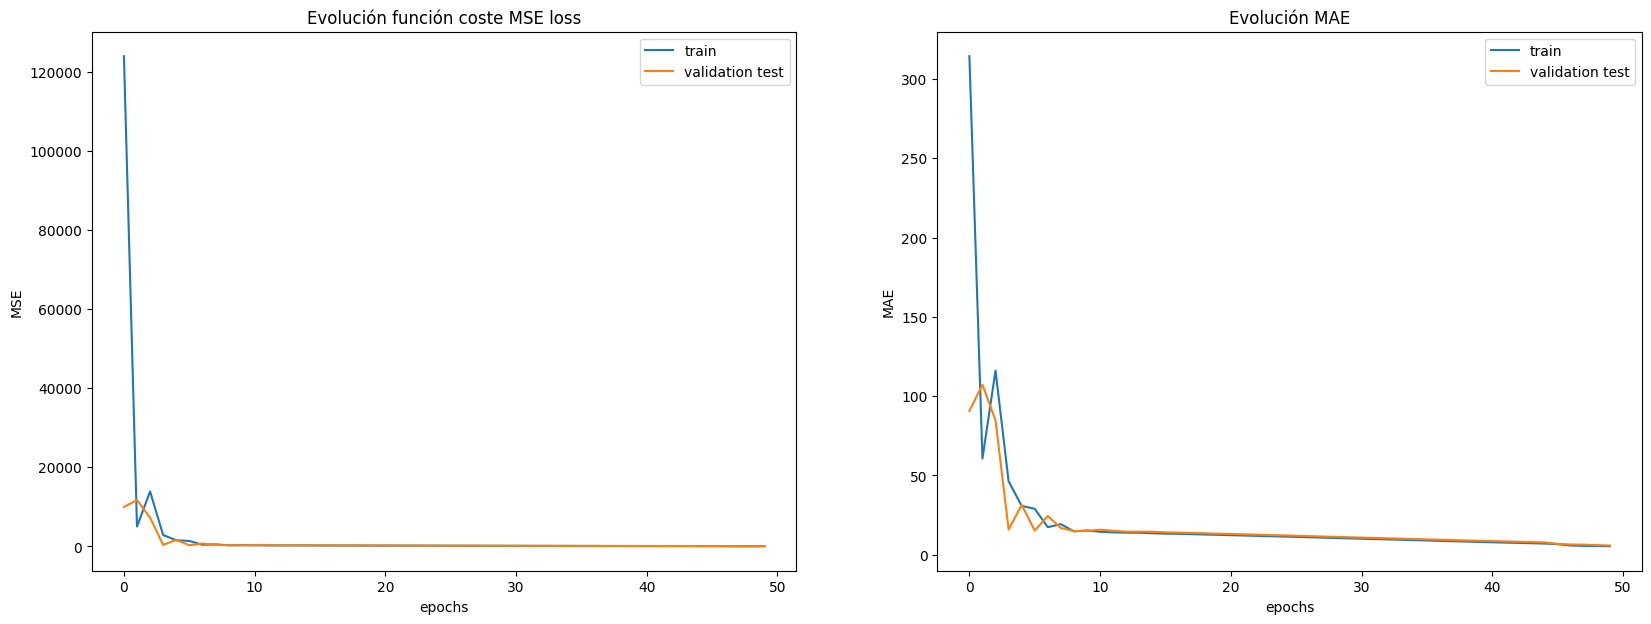

In [18]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(df_results['loss'], label='train')
plt.plot(df_results['val_loss'], label='validation test')
plt.title('Evolución función coste MSE loss')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(df_results['mean_absolute_error'], label='train')
plt.plot(df_results['val_mean_absolute_error'], label='validation test')
plt.title('Evolución MAE')
plt.xlabel('epochs')
plt.ylabel('MAE')
plt.legend();

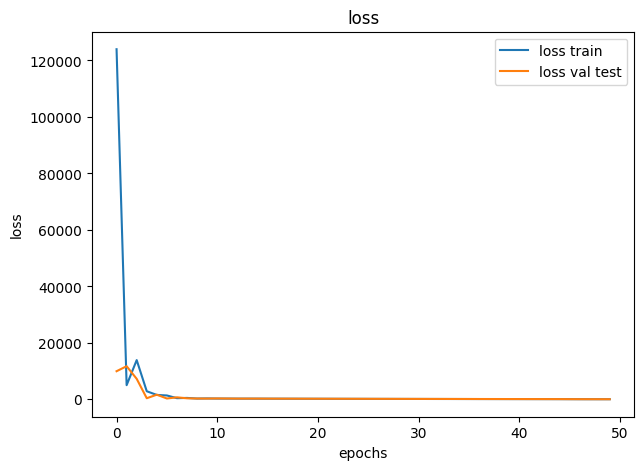

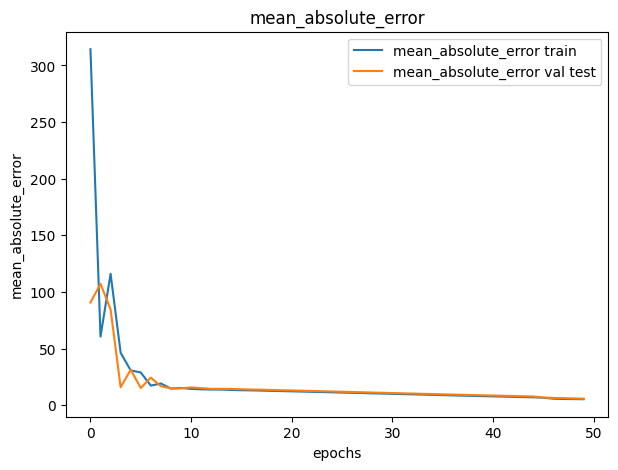

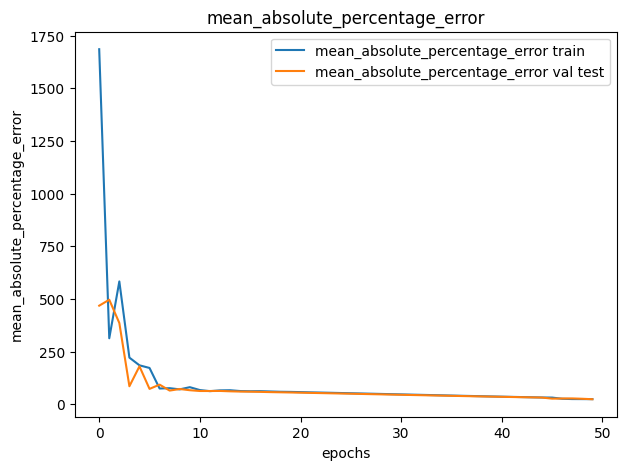

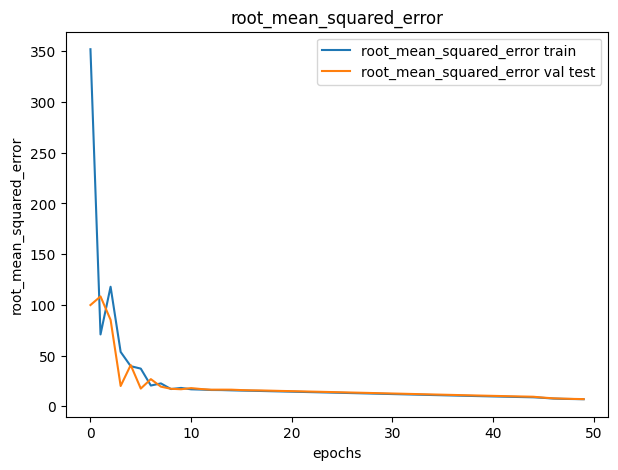

In [20]:
def plot_history(df_history):
    '''
    Dado un DataFrame con el history de entrenamiendo de una red (model.history.history)
    genera gráficas de todas las métricas disponibles. Muestra un gráfico por cada par de métricas ejemplo: 
    * loss y val_loss
    * mean_absolute_error y val_mean_absolute_error
    '''
    train_metrics = [col for col in df_history.columns if not col.startswith('val_')]
    for metric in train_metrics:
        plt.figure(figsize=(7, 5))
        plt.plot(df_history[metric], label=f'{metric} train')
        
        val_metric = f'val_{metric}'
        if val_metric in df_history.columns:
            plt.plot(df_history[val_metric], label=f'{metric} val test')
            
        plt.title(metric)
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        plt.show()
        
plot_history(df_results)

In [22]:
test_mse_loss, test_mae, test_rmse, test_mape = model.evaluate(X_test, y_test, verbose=1)
print("test_mse_loss", test_mse_loss)
print("test_mae", test_mae)
print("test_rmse", test_rmse)
print("test_mape", test_mape)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 37.7579 - mean_absolute_error: 4.6163 - mean_absolute_percentage_error: 21.1321 - root_mean_squared_error: 6.1423
test_mse_loss 35.64371109008789
test_mae 4.48625373840332
test_rmse 5.970235347747803
test_mape 21.117467880249023


In [ ]:
model.predict(X_test)[:5] #2D

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[24.77197 ],
       [28.968128],
       [22.505604],
       [23.583187],
       [27.104631]], dtype=float32)

In [24]:
y_pred = model.predict(X_test).ravel() # 1D
y_pred[:10]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([24.77197 , 28.968128, 22.505604, 23.583187, 27.104631, 24.890839,
       16.566103, 26.298382, 21.454046, 24.816616], dtype=float32)

In [25]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
print("mae test", mean_absolute_error(y_test, y_pred))
print("rmse test", root_mean_squared_error(y_test, y_pred))
print("mape test", mean_absolute_percentage_error(y_test, y_pred))

mae test 4.486253521110438
rmse test 5.970235369722738
mape test 0.2111746793309139


In [27]:
df_comparison = pd.DataFrame({"real": y_test, "prediccion": y_pred, "residuo": y_test - y_pred})
df_comparison.head()

,real,prediccion,residuo
79,26.0,24.771971,1.228029
276,21.6,28.968128,-7.368128
248,36.1,22.505604,13.594396
56,26.0,23.583187,2.416813
393,27.0,27.104631,-0.104631


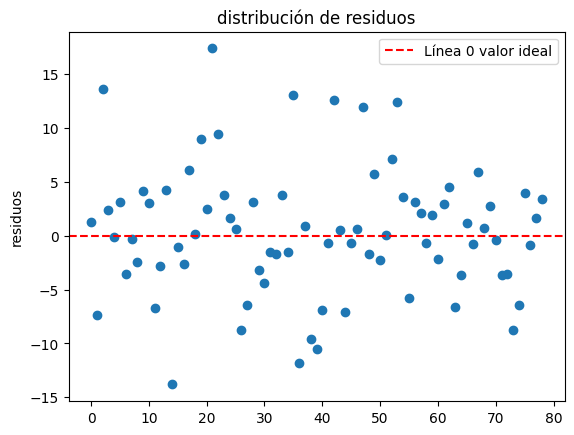

In [28]:
plt.scatter(range(len(df_comparison)), df_comparison["residuo"])
plt.axhline(y=0, color="r", linestyle="dashed", label="Línea 0 valor ideal")
plt.ylabel("residuos")
plt.title("distribución de residuos")
plt.legend();